In [1]:
import endolas
import h5py
import numpy as np
from matplotlib import pyplot as plt
import imageio
from skimage import io
from skimage import color
import skimage
import json
from tensorflow.python.keras.saving import hdf5_format

In [2]:
plt.rcParams['figure.figsize'] = (15, 15)

In [3]:
path_val='/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/validation'
path_test='/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/test'
path_workdir="/home/julian/Documents/Studium/MT-Masterarbeit/Data/Prediction/workdir"

In [4]:
img_0 = io.imread(path_val+'/160.png')
img_1 = io.imread(path_val+'/161.png')
img_2 = io.imread(path_val+'/162.png')
img_3 = io.imread(path_val+'/163.png')
img_4 = io.imread(path_test+'/200.png')
img_5 = io.imread(path_test+'/201.png')
img_6 = io.imread(path_test+'/202.png')
img_7 = io.imread(path_test+'/203.png')

In [5]:
img_0 = color.rgba2rgb(img_0)
img_1 = color.rgba2rgb(img_1)
img_2 = color.rgba2rgb(img_2)
img_3 = color.rgba2rgb(img_3)
img_4 = color.rgba2rgb(img_4)
img_5 = color.rgba2rgb(img_5)
img_6 = color.rgba2rgb(img_6)
img_7 = color.rgba2rgb(img_7)

In [6]:
img_0 = skimage.img_as_ubyte(img_0)[np.newaxis, :, :]
img_1 = skimage.img_as_ubyte(img_1)[np.newaxis, :, :]
img_2 = skimage.img_as_ubyte(img_2)[np.newaxis, :, :]
img_3 = skimage.img_as_ubyte(img_3)[np.newaxis, :, :]
img_4 = skimage.img_as_ubyte(img_4)[np.newaxis, :, :]
img_5 = skimage.img_as_ubyte(img_5)[np.newaxis, :, :]
img_6 = skimage.img_as_ubyte(img_6)[np.newaxis, :, :]
img_7 = skimage.img_as_ubyte(img_7)[np.newaxis, :, :]

In [7]:
img = np.concatenate((img_0, img_1, img_2, img_3, img_4, img_5, img_6, img_7))

In [8]:
img.shape

(8, 768, 768, 3)

In [9]:
len(img)

8

In [10]:
results = endolas.run_laser_detection(img)

Predict Segmentation
Predict Peakfinding
Predict Registration
Predict Deformation
Predict Neighbor
Predict Sorting


In [11]:
image_id = '1'

In [12]:
hf_seg = h5py.File('results/segmentation.h5', 'r')
print(hf_seg.keys())
laser_map = hf_seg.get(image_id)[()]
hf_seg.close()

<KeysViewHDF5 ['1', 'grid_height', 'grid_width', 'height', 'width']>


In [13]:
hf_peaks = h5py.File('results/peaks.h5', 'r')
print(hf_peaks.keys())
laser_peaks = json.loads(hf_peaks.get(image_id)[()])
hf_peaks.close()

<KeysViewHDF5 ['1']>


In [14]:
hf_reg = h5py.File('results/displacement.h5', 'r')
disp = hf_reg.get(image_id)[()]
fix_val = hf_reg.get('fix')[()]
ggg= hf_reg.get('grid_height')[()]
print(hf_reg.keys())
hf_reg.close()
fix = json.loads(fix_val)

<KeysViewHDF5 ['1', 'fix', 'grid_height', 'grid_width', 'height', 'width']>


In [15]:
hf_def = h5py.File('results/deformation.h5', 'r')
defo = hf_def.get(image_id)[()]
hf_reg.close()
warps = json.loads(defo)

In [16]:
img_5_mask = io.imread(path_val+'/161_m.png')

In [17]:
warps['1']

[327, 311]

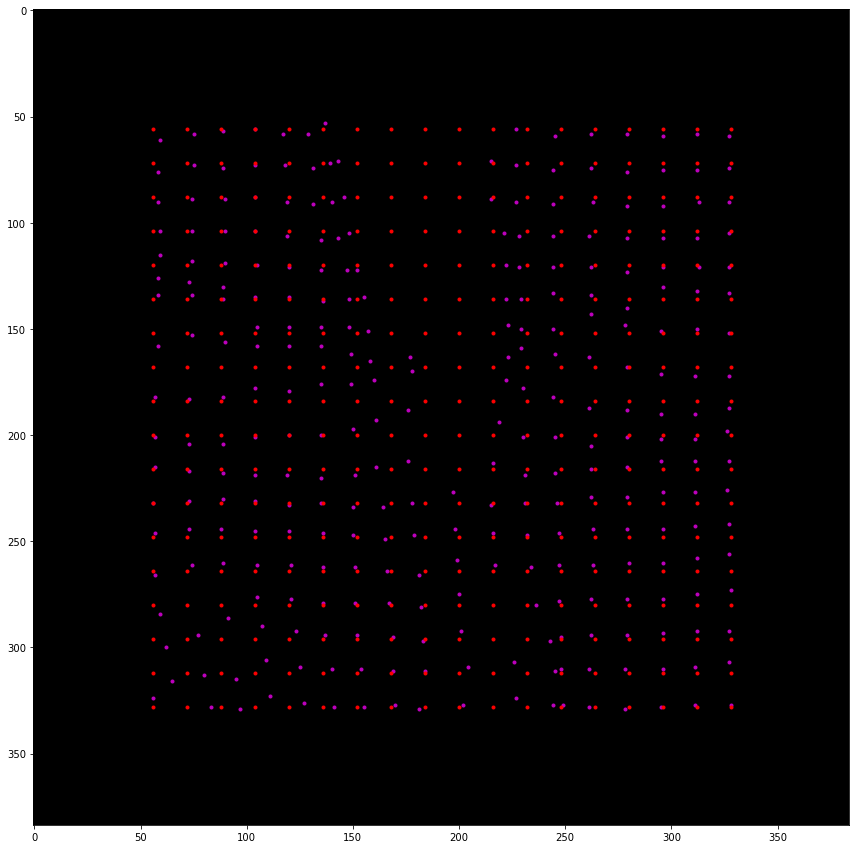

In [25]:
back=np.zeros((384,384))
plt.imshow(back, cmap='gray')
#plt.imshow(disp[:,:,0], cmap='gray')
#for key, value in laser_peaks.items():
#    plt.plot(value[1]*0.5, value[0]*0.5, 'mo', markersize=3)

for key, value in warps.items():
    plt.plot(value[1], value[0], 'mo', markersize=3)
    
for key, value in fix.items():
    plt.plot(value[1]*0.5, value[0]*0.5, 'ro', markersize=3)
    
#plt.axis('off')
#plt.savefig('results/laser_map.jpg')